<a href="https://colab.research.google.com/github/mafudsetiono/People-Analytics/blob/main/People-Analytics/People_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set(style='darkgrid', palette='colorblind')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
warnings.filterwarnings("ignore", category=FutureWarning)

#Load Data

In [ ]:
df = pd.read_csv('/content/assignment_employee_survey.csv', encoding='utf-8-sig')
df.head()

,emp_id,gender,age,marital_status,job_level,experience,dept,emp_type,wlb,work_env,...,sleep_hours,commute_mode,commute_distance,num_companies,team_size,num_reports,edu_level,have_ot,training_hours_per_year,job_satisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,45,Female,33,Married,Mid,10,Operations,Part-Time,2,3,...,6.2,Car,8,3,13,0,Bachelor,False,35.0,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766 entries, 0 to 2765
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   emp_id                   2766 non-null   int64  
 1   gender                   2766 non-null   object 
 2   age                      2766 non-null   int64  
 3   marital_status           2766 non-null   object 
 4   job_level                2766 non-null   object 
 5   experience               2766 non-null   int64  
 6   dept                     2766 non-null   object 
 7   emp_type                 2766 non-null   object 
 8   wlb                      2766 non-null   int64  
 9   work_env                 2766 non-null   int64  
 10  physical_activity_hours  2766 non-null   float64
 11  workload                 2766 non-null   int64  
 12  stress                   2766 non-null   int64  
 13  sleep_hours              2766 non-null   float64
 14  commute_mode            

Data sudah bersih tanpa missing value, jadi kita fokus ke yang lain seperti mengubah tipe data

In [ ]:
df.describe()

,emp_id,age,experience,wlb,work_env,physical_activity_hours,workload,stress,sleep_hours,commute_distance,num_companies,team_size,num_reports,training_hours_per_year,job_satisfaction
count,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000
mean,1516.601952,35.650759,8.989154,3.049530,3.028923,2.038250,2.979031,1.737166,7.008351,13.419740,4.223066,16.491685,2.374187,37.220535,3.380694
std,873.996466,10.175719,7.003013,1.448103,1.417494,0.966535,1.405335,1.065303,1.003736,8.344388,3.377586,6.638354,3.055823,13.540622,1.267785
min,1.000000,22.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000,5.000000,0.000000,10.000000,1.000000
25%,764.500000,27.000000,3.000000,2.000000,2.000000,1.400000,2.000000,1.000000,6.300000,6.000000,1.000000,11.000000,0.000000,23.500000,3.000000
50%,1515.500000,34.000000,8.000000,3.000000,3.000000,2.100000,3.000000,1.000000,7.000000,13.000000,4.000000,16.000000,0.000000,39.500000,4.000000
75%,2271.750000,43.000000,14.000000,4.000000,4.000000,2.700000,4.000000,2.000000,7.700000,20.000000,7.000000,22.000000,5.000000,46.500000,4.000000
max,3025.000000,60.000000,29.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,29.000000,12.000000,30.000000,9.000000,64.500000,5.000000


## Data Understanding
Dataset ini adalah hasil dari survei HR untuk melihat tingkat kepuasan kerja karyawan, dan berbagai data yang mempengaruhi tingkat kepuasan kerja karyawan. Dataset ini terdiri dari 22 kolom, 2766 baris. Berikut beberapa variabel penting yang dapat digunakan

- stress
- workload
- wlb
- job_statisfaction
- work_env
- sleep_hours

#Data Cleansing

In [ ]:
df.columns = df.columns.str.strip().str.lower()
df.drop_duplicates(subset=None, keep='first', inplace=False)
print(df.columns)

Index(['emp_id', 'gender', 'age', 'marital_status', 'job_level', 'experience',
       'dept', 'emp_type', 'wlb', 'work_env', 'physical_activity_hours',
       'workload', 'stress', 'sleep_hours', 'commute_mode', 'commute_distance',
       'num_companies', 'team_size', 'num_reports', 'edu_level', 'have_ot',
       'training_hours_per_year', 'job_satisfaction'],
      dtype='object')


In [ ]:
for col in ['gender', 'marital_status', 'job_level', 'dept', 'emp_type', 'commute_mode', 'edu_level']:
    df[col] = df[col].astype('category')
for col in ['physical_activity_hours', 'sleep_hours', 'training_hours_per_year']:
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='float')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766 entries, 0 to 2765
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   emp_id                   2766 non-null   int64   
 1   gender                   2766 non-null   category
 2   age                      2766 non-null   int64   
 3   marital_status           2766 non-null   category
 4   job_level                2766 non-null   category
 5   experience               2766 non-null   int64   
 6   dept                     2766 non-null   category
 7   emp_type                 2766 non-null   category
 8   wlb                      2766 non-null   int64   
 9   work_env                 2766 non-null   int64   
 10  physical_activity_hours  2766 non-null   float32 
 11  workload                 2766 non-null   int64   
 12  stress                   2766 non-null   int64   
 13  sleep_hours              2766 non-null   float32 
 14  commute_

In [ ]:
#Cek missing value
df.isnull().sum()

,0
emp_id,0
gender,0
age,0
marital_status,0
job_level,0
experience,0
dept,0
emp_type,0
wlb,0
work_env,0


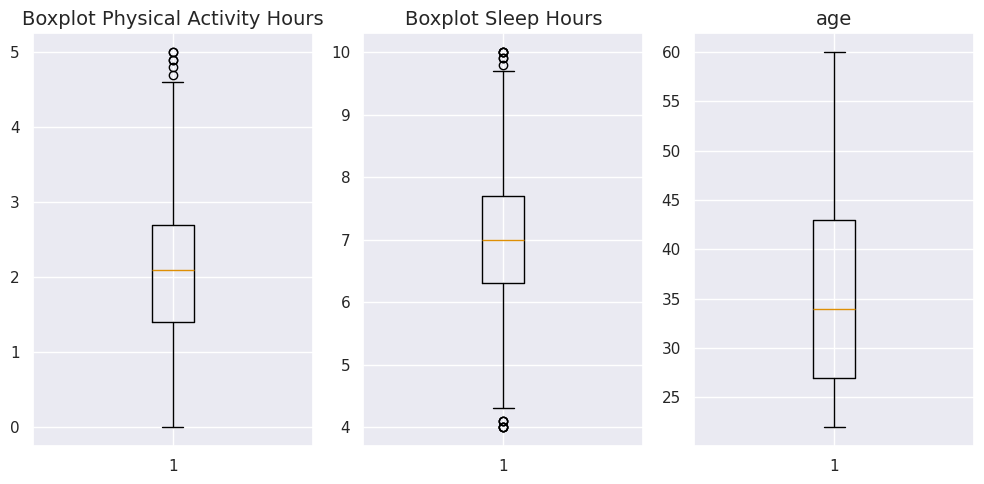

In [ ]:
#cek outlier
plt.figure(figsize=(10, 5))

plt.subplot(1,3,1)
plt.boxplot(df['physical_activity_hours'])
plt.title('Boxplot Physical Activity Hours')

plt.subplot(1,3,2)
plt.boxplot(df['sleep_hours'])
plt.title('Boxplot Sleep Hours')

plt.subplot(1,3,3)
plt.boxplot(df['age'])
plt.title('age')
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,emp_id,age,experience,wlb,work_env,physical_activity_hours,workload,stress,sleep_hours,commute_distance,num_companies,team_size,num_reports,training_hours_per_year,job_satisfaction
count,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000
mean,1516.601952,35.650759,8.989154,3.049530,3.028923,2.038250,2.979031,1.737166,7.008351,13.419740,4.223066,16.491685,2.374187,37.220535,3.380694
std,873.996466,10.175719,7.003013,1.448103,1.417494,0.966535,1.405335,1.065303,1.003733,8.344388,3.377586,6.638354,3.055823,13.540635,1.267785
min,1.000000,22.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000,5.000000,0.000000,10.000000,1.000000
25%,764.500000,27.000000,3.000000,2.000000,2.000000,1.400000,2.000000,1.000000,6.300000,6.000000,1.000000,11.000000,0.000000,23.500000,3.000000
50%,1515.500000,34.000000,8.000000,3.000000,3.000000,2.100000,3.000000,1.000000,7.000000,13.000000,4.000000,16.000000,0.000000,39.500000,4.000000
75%,2271.750000,43.000000,14.000000,4.000000,4.000000,2.700000,4.000000,2.000000,7.700000,20.000000,7.000000,22.000000,5.000000,46.500000,4.000000
max,3025.000000,60.000000,29.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,29.000000,12.000000,30.000000,9.000000,64.500000,5.000000


#Insight
Berdasarkan eksplorasi awal, dataset tidak memiliki missing values yang signifikan dan tidak ditemukan nilai ekstrem yang tidak wajar pada variabel numerik utama. Oleh karena itu, proses data cleansing difokuskan pada validasi data tanpa melakukan penghapusan atau imputasi nilai.

Adanya outlier pada sleep hours menunjukkan adanya segmen karyawan yang mungkin menghadapi masalah kesehatan serius terkait pola tidur. Perusahaan perlu menyelidiki faktor-faktor yang menyebabkan kurang tidur, seperti beban kerja berlebih atau stres

#EDA

Text(0.5, 1.0, 'Korelasi antara Kepuasan Kerja dan Faktor Skala Kunci')

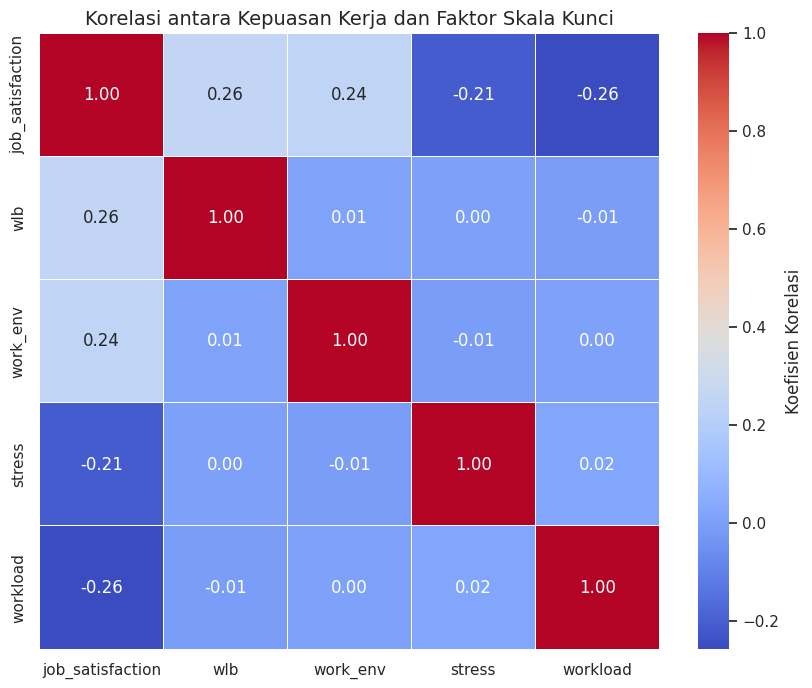

In [ ]:
correlation_matrix = df[['job_satisfaction', 'wlb', 'work_env', 'stress', 'workload']].corr()

# Visualisasi Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Koefisien Korelasi'}
)
plt.title('Korelasi antara Kepuasan Kerja dan Faktor Skala Kunci', fontsize=14)



## Faktor Utama yang Memengaruhi Kepuasan Karyawan

- Workload (-0.26) Beban kerja yang tinggi (skala 4-5) adalah faktor penarik utama yang menyebabkan ketidakpuasan.

- Stress (-0.21) Tingkat stres yang tinggi sangat kuat menarik turun kepuasan.

- work_env (0.24) Lingkungan kerja yang dinilai baik berhubungan langsung dengan kepuasan.

- Wlb (0.26) Keseimbangan kerja dan hidup yang baik adalah faktor pendorong utama kepuasan.

#Analisis faktor kunci

Noted: tidak ada gaji di kolom dataset.

#Job Statisfaction vs OT

Text(0, 0.5, 'Rata-rata Job Satisfaction (Skala 1-5)')

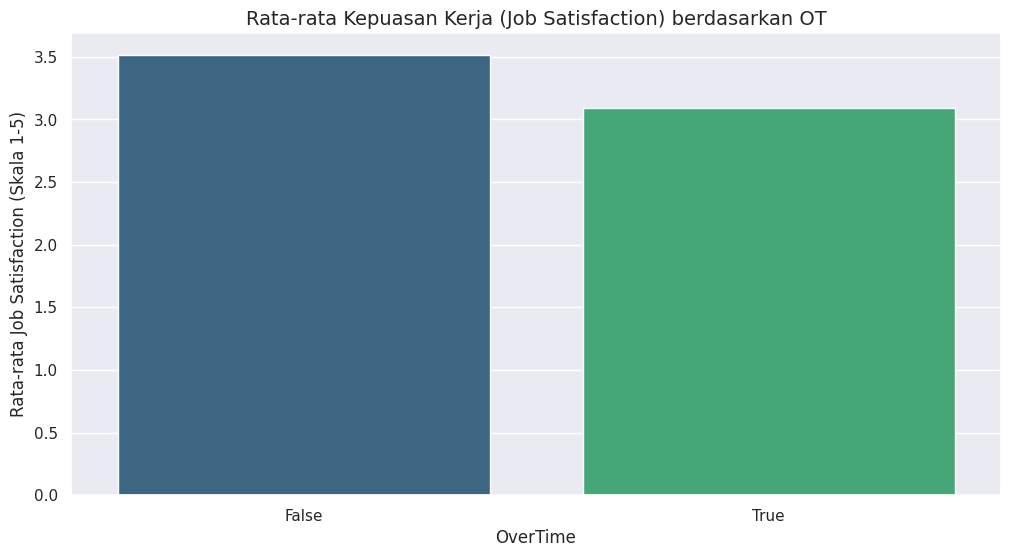

In [ ]:
job_statisfaction_by_ot = df.groupby('have_ot')['job_satisfaction'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=job_statisfaction_by_ot.index,
    y=job_statisfaction_by_ot.values,
    palette='viridis'
)
plt.title('Rata-rata Kepuasan Kerja (Job Satisfaction) berdasarkan OT', fontsize=14)
plt.xlabel('OverTime')
plt.ylabel('Rata-rata Job Satisfaction (Skala 1-5)')

##Insight

Karyawan yang tidak lembur memiliki tingkat kepuasan kerja yang lebih tinggi dibandingkan karyawan yang lembur

#Tingkat jabatan vs Job Statisfaction



Text(0, 0.5, 'Rata-rata Job Satisfaction (Skala 1-5)')

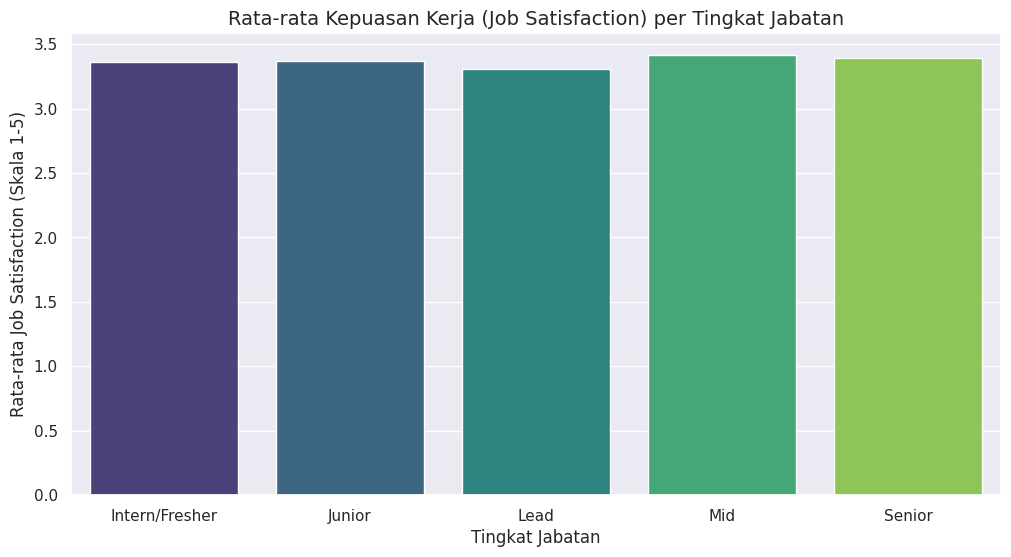

In [ ]:
job_satisfaction_by_level = df.groupby('job_level')['job_satisfaction'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=job_satisfaction_by_level.index,
    y=job_satisfaction_by_level.values,
    palette='viridis'
)
plt.title('Rata-rata Kepuasan Kerja (Job Satisfaction) per Tingkat Jabatan', fontsize=14)
plt.xlabel('Tingkat Jabatan')
plt.ylabel('Rata-rata Job Satisfaction (Skala 1-5)')


## Insight
Ternyata tingkat terlalu berpengaruh dengan tingkat kepuasan karyawan, artinya masiing-masing karyawan cukup senang dengan jabatan mereka masing-masing

#Department vs Job Statisfaction

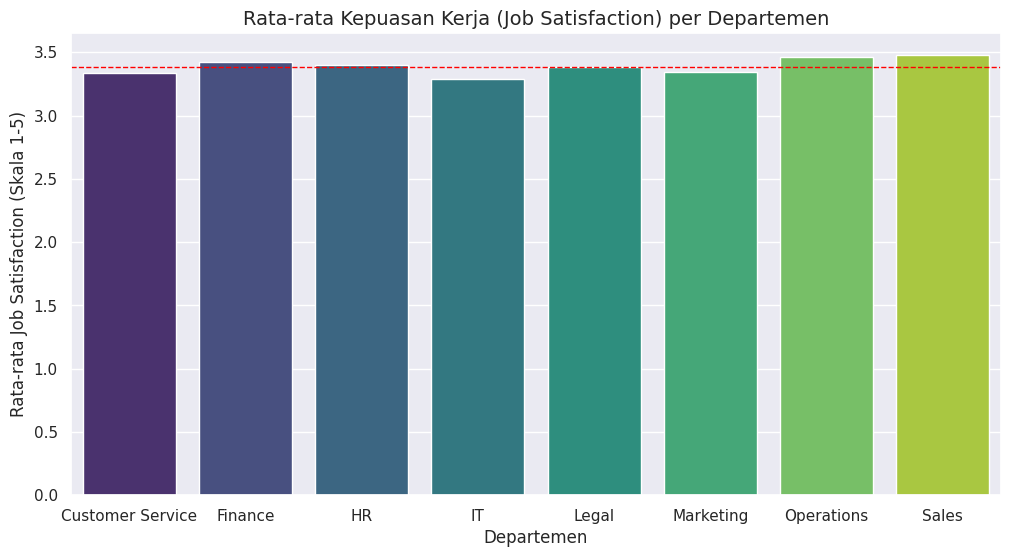

In [ ]:
dept_satisfaction = df.groupby('dept')['job_satisfaction'].mean().sort_values(ascending=False)

# Hitung rata-rata kepuasan kerja global sebagai garis pembanding
global_mean = df['job_satisfaction'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=dept_satisfaction.index,
    y=dept_satisfaction.values,
    palette='viridis'
)
plt.title('Rata-rata Kepuasan Kerja (Job Satisfaction) per Departemen', fontsize=14)
plt.xlabel('Departemen')
plt.ylabel('Rata-rata Job Satisfaction (Skala 1-5)')

plt.axhline(global_mean,
            color='red',
            linestyle='--',
            linewidth=1,
            label=f"Rata-rata Global: {global_mean:.2f}")


In [ ]:
dept_satisfaction

,job_satisfaction
dept,
Sales,3.476923
Operations,3.460976
Finance,3.423009
HR,3.400000
Legal,3.381526
Marketing,3.342466
Customer Service,3.335766
IT,3.287690


##Insight

Dapat dilihat dari hasil barchart diatas bahwa departmen IT memiliki tingkat kepuasan kerja paling rendah dibawah rata" kepuasan per departmen begitu juga dengan department marketing, kita harus menyelidiki lebih lanjut kenapa departmen IT sangat rendah, mungkin dari tingkat stress, atau lingkungan kerja.

#Department vs Beban kerja (Work load)

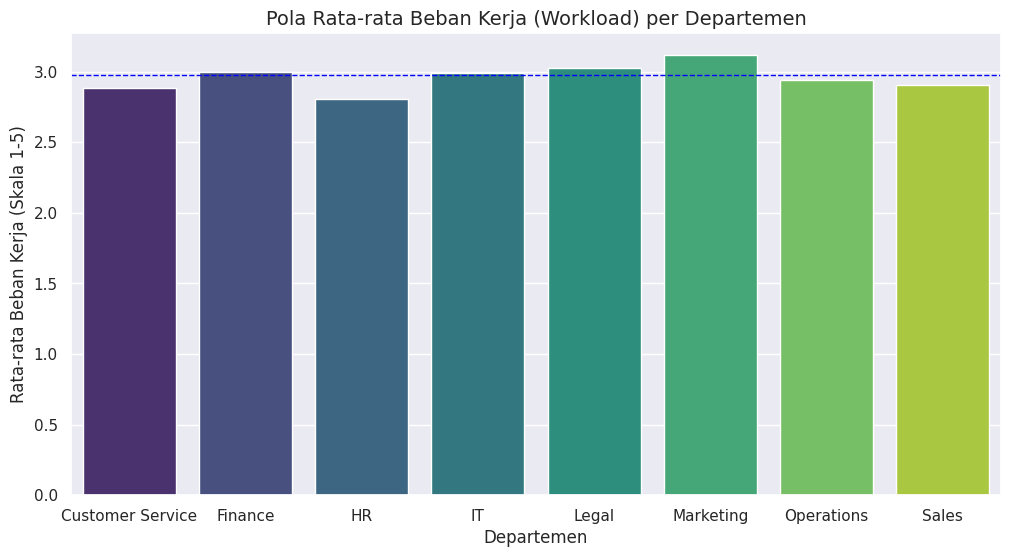

In [ ]:
# Hitung Rata-rata Beban Kerja (Workload) per Departemen
dept_workload = df.groupby('dept')['workload'].mean().sort_values(ascending=False)

# Hitung rata-rata beban global sebagai garis pembanding
global_mean_workload = df['workload'].mean()

# Visualisasi menggunakan Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=dept_workload.index,
    y=dept_workload.values,
    palette='viridis'
)
plt.title('Pola Rata-rata Beban Kerja (Workload) per Departemen', fontsize=14)
plt.xlabel('Departemen')
plt.ylabel('Rata-rata Beban Kerja (Skala 1-5)')

# Tambahkan garis horizontal untuk rata-rata global
plt.axhline(global_mean_workload,
            color='blue',
            linestyle='--',
            linewidth=1,
            label=f"Rata-rata Global Workload: {global_mean_workload:.2f}")


In [ ]:
dept_workload

,workload
dept,
Marketing,3.116438
Legal,3.024096
Finance,2.996460
IT,2.990318
Operations,2.941463
Sales,2.907692
Customer Service,2.883212
HR,2.807692


## Insight

Hasil penyelidikan dari pola diatas tentang tingkat kepuasan per deepartment, kita mencari tahu kenapa departmen IT dan Marketing memiliki tingkat kepuasan kerja dibawah rata-rata. Ternyata dari hasil beban kerja per departemen, kita mengetahui bahwa marketing memiliki beban kerja paling tinggi dibandingkan departemen lain

#Department vs Stress

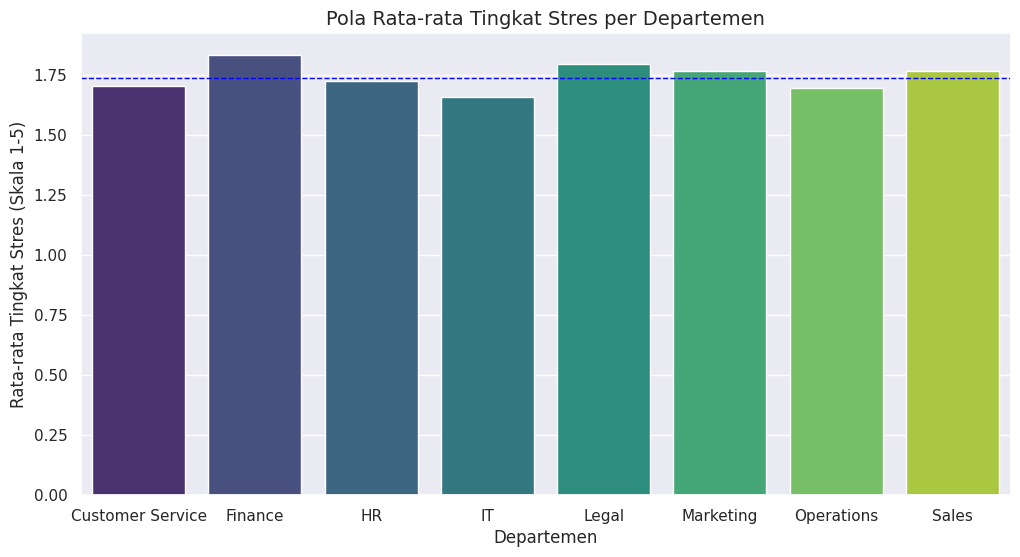

In [ ]:
dept_stress = df.groupby('dept')['stress'].mean().sort_values(ascending=False)

#Hitung rata-rata stress global sebagai garis pembanding
global_mean_stress = df['stress'].mean()

#Visualisasi Menggunakan bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=dept_stress.index,
    y=dept_stress.values,
    palette='viridis'
)
plt.title('Pola Rata-rata Tingkat Stres per Departemen', fontsize=14)
plt.xlabel('Departemen')
plt.ylabel('Rata-rata Tingkat Stres (Skala 1-5)')

# Tambahkan garis horizontal untuk rata-rata global
plt.axhline(global_mean_stress,
            color='blue',
            linestyle='--',
            linewidth=1,
            label=f"Rata-rata Global Workload: {global_mean_stress:.2f}")

## Insight

Dari hasil barchart diatas dapat diketahui ternyata finance memiliki tingkat stress diatas rata-rata dari semua departement.

#Department vs Work Life Balance

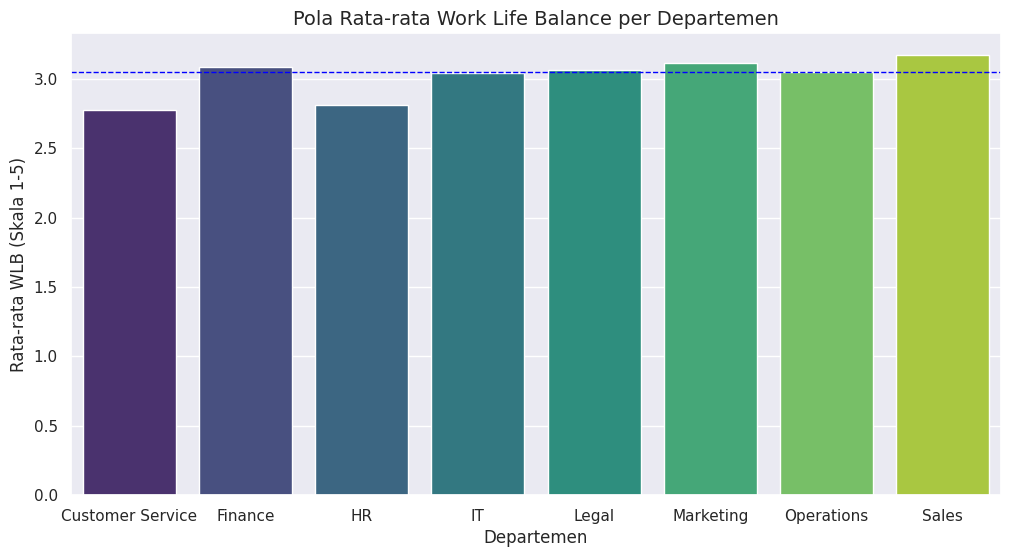

In [ ]:
dept_wlb = df.groupby('dept')['wlb'].mean().sort_values(ascending=False)

#Hitung rata" global sebagai garis pembanding
global_mean_wlb = df['wlb'].mean()

#Visualisasi bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=dept_wlb.index,
    y=dept_wlb.values,
    palette='viridis'
)
plt.title('Pola Rata-rata Work Life Balance per Departemen', fontsize=14)
plt.xlabel('Departemen')
plt.ylabel('Rata-rata WLB (Skala 1-5)')

# Tambahkan garis horizontal untuk rata-rata global
plt.axhline(global_mean_wlb,
            color='blue',
            linestyle='--',
            linewidth=1,
            label=f"Rata-rata Global Workload: {global_mean_wlb:.2f}")

##Insight
Dari hasil diatas tidak terlalu terlihat perbedaan WLB per departemen di angka 3, namun ada beberapa concern terhadap departemen HR dan Customer Service yang berada dibawah rata-rata. padahal beban kerja dan stress mereka dibawah rata-rata.

#Department vs Work Environment

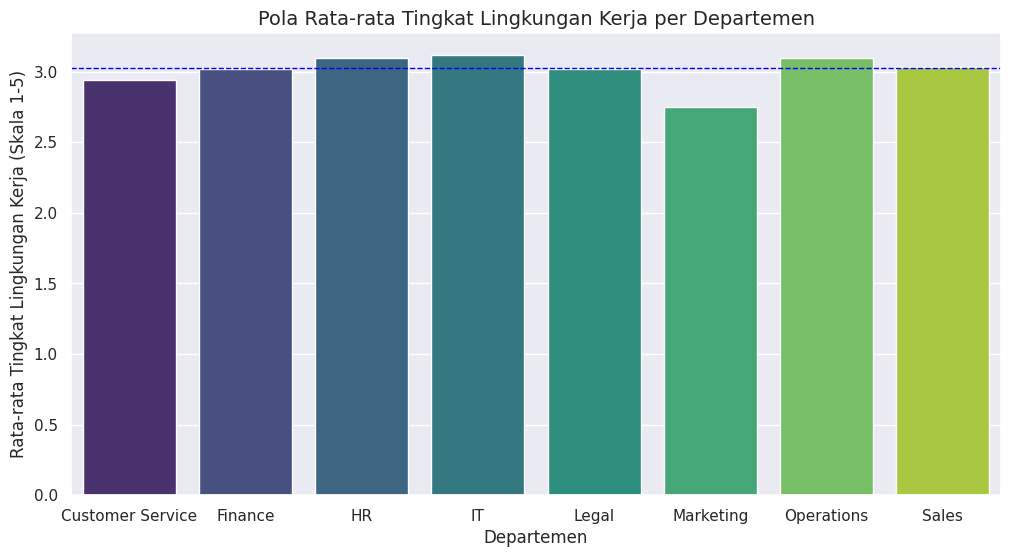

In [ ]:
dept_work_env = df.groupby('dept')['work_env'].mean().sort_values(ascending=False)

#Hitung rata" global sebgai garis pembanding
global_mean_work_env = df['work_env'].mean()

#Visualisasi bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=dept_work_env.index,
    y=dept_work_env.values,
    palette='viridis'
)
plt.title('Pola Rata-rata Tingkat Lingkungan Kerja per Departemen', fontsize=14)
plt.xlabel('Departemen')
plt.ylabel('Rata-rata Tingkat Lingkungan Kerja (Skala 1-5)')

# Tambahkan garis horizontal untuk rata-rata global
plt.axhline(global_mean_work_env,
            color='blue',
            linestyle='--',
            linewidth=1,
            label=f"Rata-rata Global Workenv: {global_mean_work_env:.2f}")


#Insight
Hasil ini semakin memperkuat alasan tingkat kepuasan kerja departemen marketing sangat rendah dibawah rata-rata departemen lain. Lingkungan kerja departemen marketing harus ditinjau lagi agar pegawai di dalamnya cukup nyaman dengan lingkungan kerja mereka

# Insight Segmentasi Departemen

Terlihat jelas bahwa memang tidak ada perbedaan yang signifikan dari semua departmen. namun yang saya bingung disini adalah departemen IT yang memiliki tingkat kepuasan terendah, padahal dari beban kerja, WLB, lingkungan kerja, dan tingkat stress, departemen IT sudah terbilang cukup baik dan stabil. Butuh analisis mendalam mengenai kenapa IT memiliki tingkat kepuasan kerja paling rendah, mungkin dengan tugas yang stagnan, kurangnya apresiasi, atau mungkin dari hal eksternal seperti gaji, tapi tidak ada keterangan mengenai gaji di dataset ini

#Job Statisfaction vs Stres

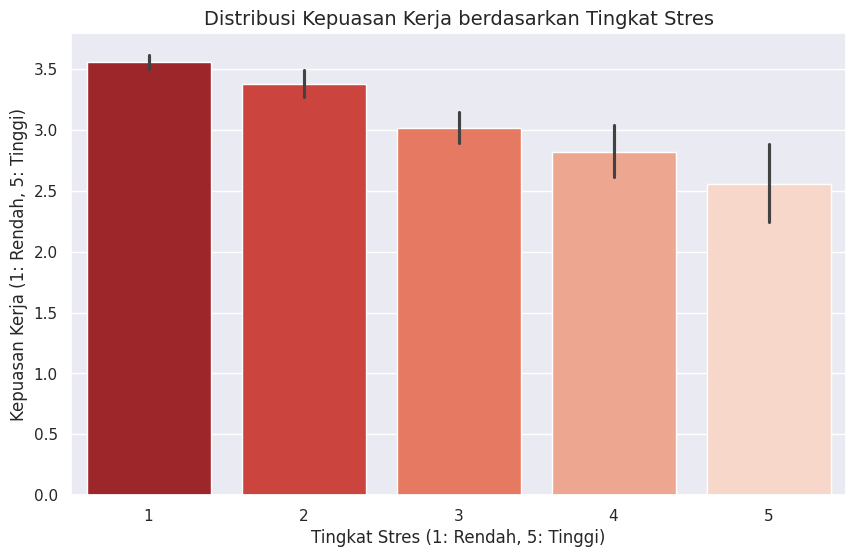

In [ ]:
# Visualisasi job statisfaction dan stress
plt.figure(figsize=(10, 6))
sns.barplot(
    x='stress',
    y='job_satisfaction',
    data=df,
    palette='Reds_r'
)
plt.title('Distribusi Kepuasan Kerja berdasarkan Tingkat Stres', fontsize=14)
plt.xlabel('Tingkat Stres (1: Rendah, 5: Tinggi)')
plt.ylabel('Kepuasan Kerja (1: Rendah, 5: Tinggi)')
plt.show()

## Insight
Dapat dilihat dari barchart diatas bahwa tingkat stress mempengaruhi tingkat kepuasan kerja.
- Semakin tinggi tingkat stress, semakin rendah tingkat kepuasan.
- Semakin rendah tingkat stress, semakin tinggi tingkat kepuasan.

# Job Statisfaction vs Work life Balance

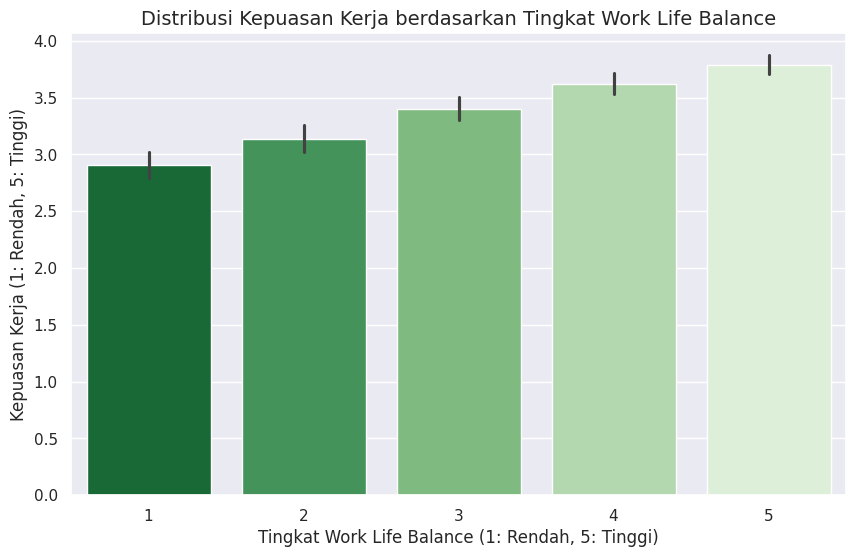

In [ ]:
# Visualisasi job statisfaction dan wlb
plt.figure(figsize=(10, 6))
sns.barplot(
    x='wlb',
    y='job_satisfaction',
    data=df,
    palette='Greens_r'
)
plt.title('Distribusi Kepuasan Kerja berdasarkan Tingkat Work Life Balance', fontsize=14)
plt.xlabel('Tingkat Work Life Balance (1: Rendah, 5: Tinggi)')
plt.ylabel('Kepuasan Kerja (1: Rendah, 5: Tinggi)')
plt.show()

## Insight
WLB sangat mempengaruhi tingkat kepuasan kerja, ini membuktikan bahwa kebanyakan pegawai lebih concern dengan work life balance mereka.

#Job Statisfaction vs Work Environment

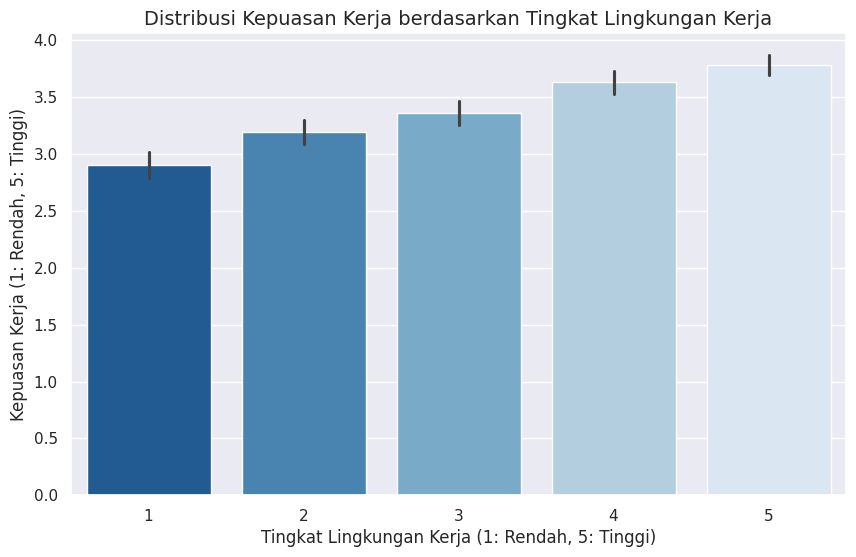

In [ ]:
#Visualisasi job statisfaction dan lingkungan kerja
plt.figure(figsize=(10, 6))
sns.barplot(
    x='work_env',
    y='job_satisfaction',
    data=df,
    palette='Blues_r'
)
plt.title('Distribusi Kepuasan Kerja berdasarkan Tingkat Lingkungan Kerja', fontsize=14)
plt.xlabel('Tingkat Lingkungan Kerja (1: Rendah, 5: Tinggi)')
plt.ylabel('Kepuasan Kerja (1: Rendah, 5: Tinggi)')
plt.show()

## Insight
Dapat dilihat dari barchart diatas bahwa tingkat kepuasan dipengaruhi dengan tingkat lingkungan kerja.
Lingkungan kerja yang baik, positif dan budaya perusahaan yang mendukung pegawainya sangat mempengaruhi tingkat kepuasan kerja pegawai.  

#Job Statisfaction vs Work Load

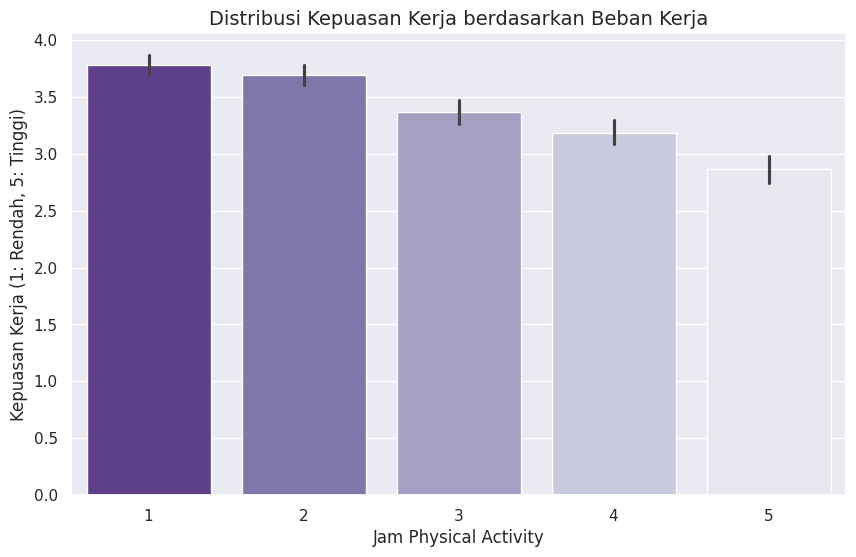

In [ ]:
#Visuaisasi  Job Statisfaction dan Work Load
plt.figure(figsize=(10, 6))
sns.barplot(
    x='workload',
    y='job_satisfaction',
    data=df,
    palette='Purples_r'
)
plt.title('Distribusi Kepuasan Kerja berdasarkan Beban Kerja', fontsize=14)
plt.xlabel('Jam Physical Activity')
plt.ylabel('Kepuasan Kerja (1: Rendah, 5: Tinggi)')
plt.show()


##Insight
Dapat dilihat dari barchart diatas bahwa tingkat kepuasan dipengaruhi dengan beban kerja. Beban kerja yang tidak terlalu berat memiliki tingkat kepuasan kerja pegawai, mungkin ada langkah lanjutan seperti menghire pegawai lagi agar beban kerjanya tidak terlalu berat.

#Save Data

In [ ]:
df.to_csv('assignment_people_final.csv', index=False)